In [1]:
import os
import torch
import numpy as np
import setup.dataset as dataset
import setup.ResUNet as ResUNet
import setup.classifier as classifier
from torch.utils.data import SubsetRandomSampler
from PIL import Image
import matplotlib.pyplot as plt

np.random.seed(0)
torch.manual_seed(0)

DATASET_PATH = 'dataset/test'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

weed_dataset = dataset.WeedDataset(DATASET_PATH, random_rotate=False)

test_indices = list(range(len(weed_dataset)))

FILTER_LIST = [16,32,64,128,256]

model = ResUNet.ResUNet(FILTER_LIST).to(device)
path = 'outputs/ResUNet.pt'

classifier = classifier.WeedClassifier(model, device)
if str(device) == 'cpu':
    classifier.model.load_state_dict(torch.load(path, map_location='cpu'))
else:
    classifier.model.load_state_dict(torch.load(path))

cuda


In [2]:
i=0

In [3]:
image_index = test_indices[i]
sample = weed_dataset[image_index]

In [9]:
print(sample['image'].shape[1])

256


13.png  Score: 0.769358141455522


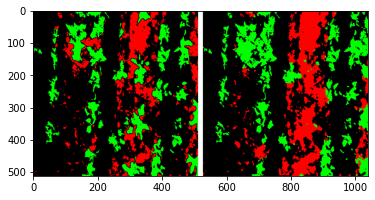

In [38]:
image_index = test_indices[i]
sample = weed_dataset[image_index]
mask, output, score = classifier.predict(sample)

print('{}.png  Score: {}'.format(image_index, score))

mask = Image.fromarray((mask * 255).astype(np.uint8))
output = Image.fromarray((output * 255).astype(np.uint8))

# rgb = rgb.numpy().transpose(1, 2, 0)

# Image.fromarray(np.hstack((np.array(mask),np.array(output)))).show()

# mask.show()
# output.show()

line = (np.ones((512,15,3))*255).astype(np.uint8)

plt.imshow(Image.fromarray(np.hstack((np.array(mask), line, np.array(output)))))

i += 1
if i >= len(test_indices):
    i = 0